<a href="https://colab.research.google.com/github/pvihung/ML/blob/main/ML_Sleep_health_lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING FILE

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    Normalizer,
    OneHotEncoder,
    LabelEncoder,
    OrdinalEncoder,
    Binarizer,
    PolynomialFeatures,
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    mean_squared_error,
    r2_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras import callbacks
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
file_path1 = '/content/Sleep_health_and_lifestyle_dataset.csv'
sleep_lifestyle = pd.read_csv(file_path1)
sleep_lifestyle

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df = sleep_lifestyle.copy()

# WRAGLING and OVERVIEWING Data

## Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Finding**: All variables in ***sleep_lifestyle*** dataset are non_null. There are ***5*** non_numerical variables in this dataset, including: gender, Occupation, BMI Category, Blood Pressure, and Sleep Disorder.

array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>, <Axes: >]], dtype=object)

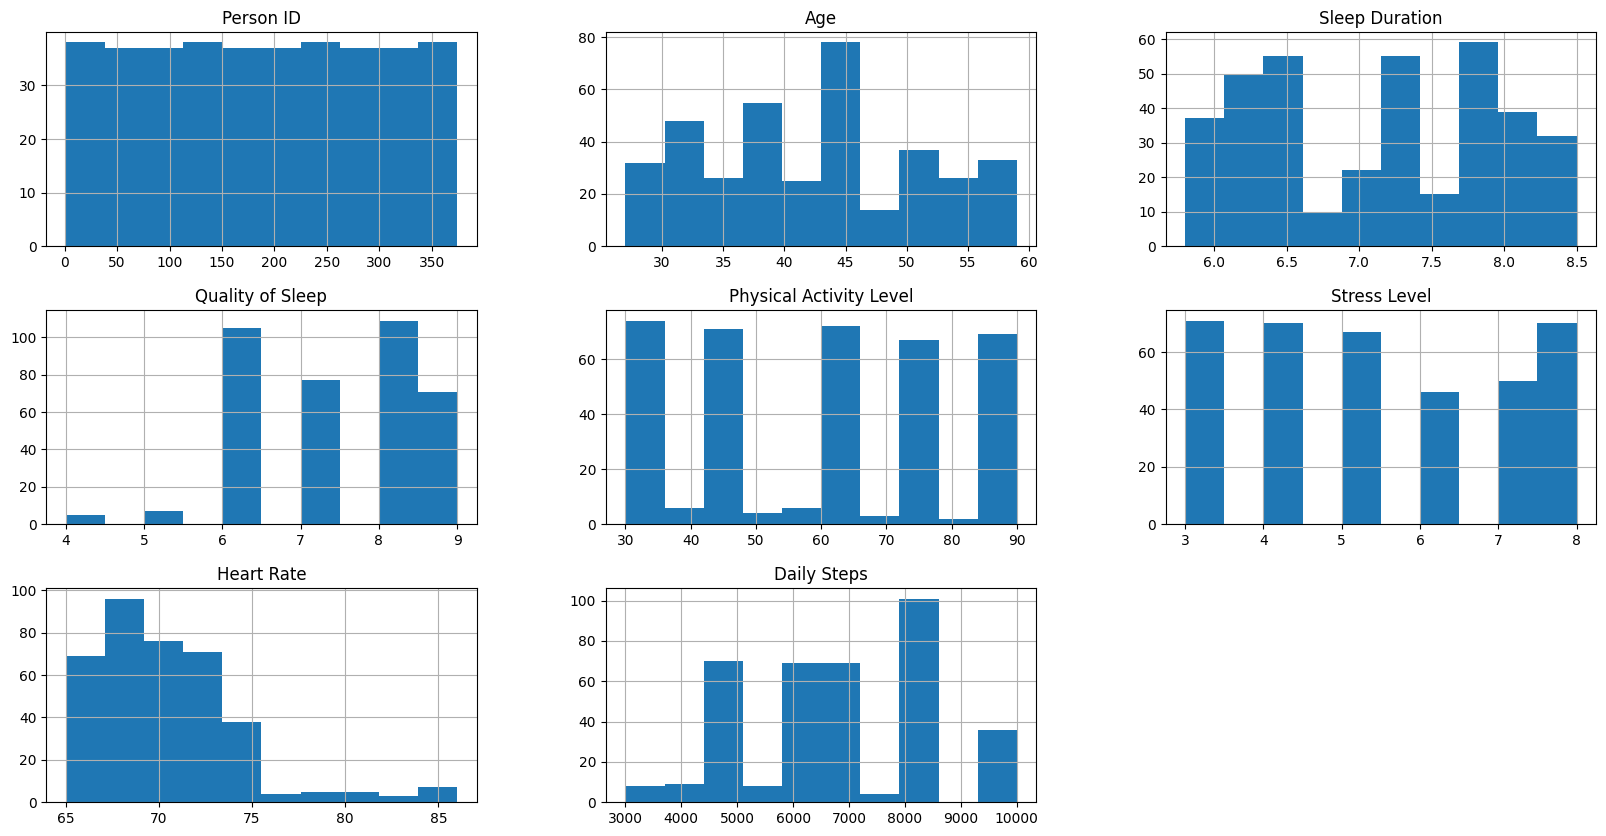

In [5]:
df.hist(figsize=(20,10))

## Normalize Data

### Checking Gender, Occupation, BMI Category, Blood Pressure, and Sleep Disorder (non_numerical variables).


In [6]:
print('Gender:',df.Gender.unique())
print('Occupations:',df.Occupation.unique())
print('BMI:',df['BMI Category'].unique())
print('Blood Pressure:', df['Blood Pressure'].unique())
print('Sleep Disorder:', df['Sleep Disorder'].unique()) # Change nan to None

# We can tell that BMI Category has both Normal and Normal Weight, which should be group together
# We can see that Salesperson and Sales Representative are somewhat similar, so we can should them as Sales Representative
df['BMI Category'] = df['BMI Category'].str.replace('Normal Weight', 'Normal')
df['Occupation'] = df['Occupation'].str.replace('Salesperson', 'Sales Representative')
df['Sleep Disorder'].fillna('None',inplace = True)

Gender: ['Male' 'Female']
Occupations: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder: [nan 'Sleep Apnea' 'Insomnia']


/tmp/ipython-input-2582929668.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('None',inplace = True)


***Note***: Based on this, we can see that Engineer overlap with Software Engineer, but we can not just group them together since it is true that there are many types of engineer.

-> Create a new features as Department might be a good ideas to differentiate these Occupations

## Remove Duplicates

In [7]:
df = df.drop_duplicates()

## Remove Outlier

In [8]:
df.describe(exclude=None)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


***Finding***: Based on these dataframe from describe(), I would say there might not be outlier in this dataset.

## Validation

### Approach:
- Dropping Person ID -> does not provide any information for our model
- Gender change to 1/0 -> dealing with non_numeric value
- BMI Category change to 0,1,2 -> Easier to categorize the BMI level
- Seperate Blood Pressure to 'Systolic' and 'Diastolic' -> to deal with non_numerical value and make use of both number in Blood Pressure
- Create a new Department feature

#### Drop Person ID

In [9]:
df.drop(columns='Person ID', inplace= True)

#### Change Gender to Male or Non_Male (1/0)

In [10]:
df.Gender = list(map(lambda x: 1 if x=='Male' else 0, df['Gender']))
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,0,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [11]:
df['Gender']=df['Gender'].astype('int')
df['Gender'].value_counts()

,count
Gender,
1,189
0,185


#### Change BMI to Number

In [12]:
BMI_cate = {'Overweight':2, 'Obese':1, 'Normal':0}
df['BMI Category'] = df['BMI Category'].map(BMI_cate)
df['BMI Category']

,BMI Category
0,2
1,0
2,0
3,1
4,1
...,...
369,2
370,2
371,2
372,2


#### Seperate Blood Pressure to 'Systolic' and 'Diastolic'

In [13]:
df['Systolic'] = df['Blood Pressure'].str.split('/').str[0].astype('int')
df['Diastolic'] = df['Blood Pressure'].str.split('/').str[1].astype('int')
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,None,126,83
1,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,None,125,80
2,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,None,125,80
3,1,28,Sales Representative,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea,140,90
4,1,28,Sales Representative,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95
370,0,59,Nurse,8.0,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95
371,0,59,Nurse,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95
372,0,59,Nurse,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95


#### Create **Department**

In [14]:
department_map = {
    'Engineer' : 'STEM',
    'Software Engineer' : 'STEM',
    'Scientist' : 'STEM',
    'Doctor' : 'Health',
    'Nurse':'Health',
    'Teacher' : 'Education',
    'Sales Representative': 'Business',
    'Accountant' : 'Business',
    'Manager': 'Business',
    'Lawyer' : 'Law'
}

df['Department'] = df['Occupation'].map(department_map)
df['Department'].value_counts()

,count
Department,
Health,144
Business,72
STEM,71
Law,47
Education,40


## Test Correlation

In order to test correlation, we will need encode Occupation and Sleep Disorder. However, we might not want to do this before splitting the data to prevent data leakage

-> In order to solve it, I will create a copy of my df and OneHotEncode those variables to check the correlation

In [15]:
df_copy = df.copy()

In [16]:
df_copy

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Department
0,1,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,None,126,83,STEM
1,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,None,125,80,Health
2,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,None,125,80,Health
3,1,28,Sales Representative,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea,140,90,Business
4,1,28,Sales Representative,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea,140,90,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95,Health
370,0,59,Nurse,8.0,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95,Health
371,0,59,Nurse,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95,Health
372,0,59,Nurse,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95,Health


In [17]:
encoded_occ = pd.get_dummies(df_copy['Occupation'], prefix='Occupation')
encoded_depart = pd.get_dummies(df_copy['Department'], prefix = 'Department')
encoded_target = pd.get_dummies(df_copy['Sleep Disorder'], prefix ='Disorder')

test = pd.concat([encoded_depart,encoded_occ,encoded_target], axis=1)

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Department_Business              374 non-null    bool 
 1   Department_Education             374 non-null    bool 
 2   Department_Health                374 non-null    bool 
 3   Department_Law                   374 non-null    bool 
 4   Department_STEM                  374 non-null    bool 
 5   Occupation_Accountant            374 non-null    bool 
 6   Occupation_Doctor                374 non-null    bool 
 7   Occupation_Engineer              374 non-null    bool 
 8   Occupation_Lawyer                374 non-null    bool 
 9   Occupation_Manager               374 non-null    bool 
 10  Occupation_Nurse                 374 non-null    bool 
 11  Occupation_Sales Representative  374 non-null    bool 
 12  Occupation_Scientist             374 non-null    b

In [19]:
test= test.astype('int')
test

,Department_Business,Department_Education,Department_Health,Department_Law,Department_STEM,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Disorder_Insomnia,Disorder_None,Disorder_Sleep Apnea
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
370,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
371,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
372,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [20]:
df_copy=pd.concat([df_copy, test], axis = 1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Occupation                       374 non-null    object 
 3   Sleep Duration                   374 non-null    float64
 4   Quality of Sleep                 374 non-null    int64  
 5   Physical Activity Level          374 non-null    int64  
 6   Stress Level                     374 non-null    int64  
 7   BMI Category                     374 non-null    int64  
 8   Blood Pressure                   374 non-null    object 
 9   Heart Rate                       374 non-null    int64  
 10  Daily Steps                      374 non-null    int64  
 11  Sleep Disorder                   374 non-null    object 
 12  Systolic              

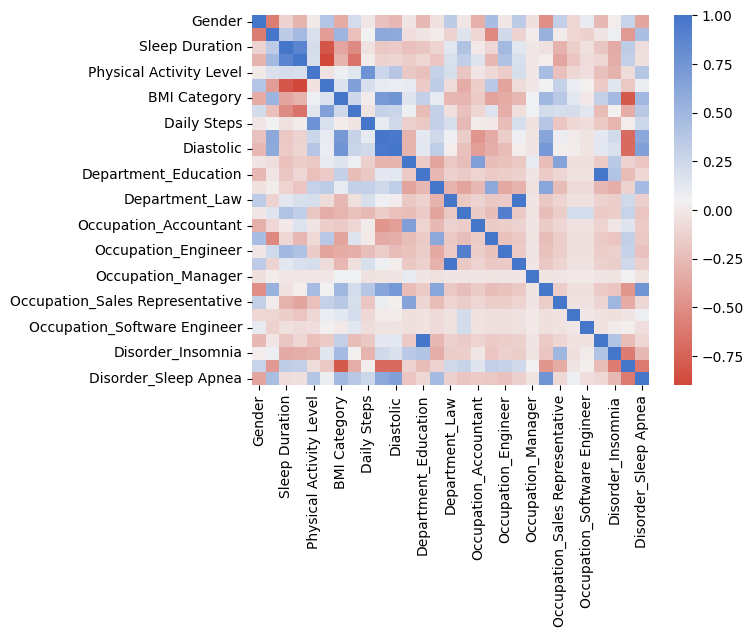

In [21]:
df_copy_corr = df_copy.corr(numeric_only=True)
sns.heatmap(df_copy_corr,cmap=sns.diverging_palette(15, 255, as_cmap=True))
plt.show()

In [22]:
display(df_copy_corr['Disorder_Sleep Apnea'].sort_values(ascending=False).nlargest(7))
display(df_copy_corr['Disorder_Sleep Apnea'].sort_values(ascending=False).nsmallest(5))

,Disorder_Sleep Apnea
Disorder_Sleep Apnea,1.000000
Occupation_Nurse,0.760092
Diastolic,0.673079
Systolic,0.611389
BMI Category,0.489918
Department_Health,0.472937
Age,0.445719


,Disorder_Sleep Apnea
Disorder_None,-0.610180
Gender,-0.374060
Disorder_Insomnia,-0.261378
Occupation_Engineer,-0.213458
Department_Business,-0.200572


***Finding***: Occupation_Nurse, Diastolic, Systolic, BMI Category, Department_Health, Age are highly correlating with **Sleep Apnea**

In [23]:
display(df_copy_corr['Disorder_None'].sort_values(ascending=True).nsmallest(8))

,Disorder_None
BMI Category,-0.790278
Diastolic,-0.705025
Systolic,-0.692480
Disorder_Sleep Apnea,-0.610180
Disorder_Insomnia,-0.605234
Occupation_Nurse,-0.462127
Age,-0.432007
Occupation_Sales Representative,-0.338126


***Finding***: BMI_Category, Diastolic, Systolic, Occupation_Nurse, Age, Occupation_Sales Representative are highly opposite with **None** sleep disorder (meaning more chances of having sleep disorder)

In [24]:
display(df_copy_corr['Disorder_Insomnia'].sort_values(ascending=False).nlargest(6))
display(df_copy_corr['Disorder_Insomnia'].sort_values(ascending=False).nsmallest(5))

,Disorder_Insomnia
Disorder_Insomnia,1.000000
Occupation_Sales Representative,0.506048
BMI Category,0.470559
Department_Education,0.401501
Occupation_Teacher,0.401501
Department_Business,0.355166


,Disorder_Insomnia
Disorder_None,-0.605234
Sleep Duration,-0.347618
Quality of Sleep,-0.332406
Department_Health,-0.321351
Physical Activity Level,-0.302352


***Finding***: Occupation_Sales Representative, BMI_Category, Occupation_Teacher, Department_Business are highly correlating with **Insomnia**.

While Sleep_Duration, Quality_of_sleep, Department_Health, and Physical_Activity_Level are moderately opposite to **Insomnia**.

Based on the findings, Diastolic and Systolic are highly correlating with our labels (sleep disorder). We can try some new features, which might helps us getting higher correlations:

These are some that might work:
- Pulse Pressure = Systolic - Diastolic
- Rate Pressure Product = Systolic * HR -> This indicates the quantify the heart's energy requirements, assess cardiovascular health

In [25]:
test = df_copy.copy() #Since we just want to test out, then I will test it on a new copy

In [26]:
def calculating(x, a, b):
  final = 0
  if x== 'minus':
    final = a-b
  if x== 'plus':
    final = a + b
  if x== 'multiply':
    final = a*b
  if x == 'divide':
    final = a/b
  return final

test['Pulse Pressure'] = calculating('minus', test['Systolic'], test['Diastolic'])
test['Rate Pressure Product'] = calculating('multiply', test['Systolic'] ,test['Heart Rate'])
test

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Disorder_Insomnia,Disorder_None,Disorder_Sleep Apnea,Pulse Pressure,Rate Pressure Product
0,1,27,Software Engineer,6.1,6,42,6,2,126/83,77,...,0,0,0,1,0,0,1,0,43,9702
1,1,28,Doctor,6.2,6,60,8,0,125/80,75,...,0,0,0,0,0,0,1,0,45,9375
2,1,28,Doctor,6.2,6,60,8,0,125/80,75,...,0,0,0,0,0,0,1,0,45,9375
3,1,28,Sales Representative,5.9,4,30,8,1,140/90,85,...,0,1,0,0,0,0,0,1,50,11900
4,1,28,Sales Representative,5.9,4,30,8,1,140/90,85,...,0,1,0,0,0,0,0,1,50,11900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,2,140/95,68,...,1,0,0,0,0,0,0,1,45,9520
370,0,59,Nurse,8.0,9,75,3,2,140/95,68,...,1,0,0,0,0,0,0,1,45,9520
371,0,59,Nurse,8.1,9,75,3,2,140/95,68,...,1,0,0,0,0,0,0,1,45,9520
372,0,59,Nurse,8.1,9,75,3,2,140/95,68,...,1,0,0,0,0,0,0,1,45,9520


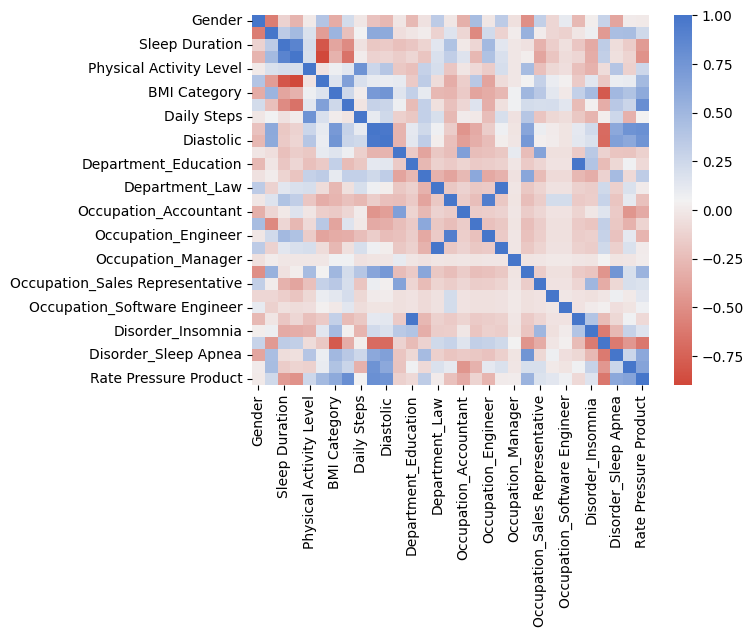

In [27]:
test_corr = test.corr(numeric_only=True)
sns.heatmap(test_corr, cmap=sns.diverging_palette(15, 255, as_cmap=True))
plt.show()

In [28]:
test_corr.Disorder_Insomnia.sort_values(ascending=False)

,Disorder_Insomnia
Disorder_Insomnia,1.000000
Occupation_Sales Representative,0.506048
BMI Category,0.470559
Department_Education,0.401501
Occupation_Teacher,0.401501
Department_Business,0.355166
Pulse Pressure,0.288380
Systolic,0.229359
Diastolic,0.182657
Rate Pressure Product,0.159599


***Note***: New features do not work with **Insomnia**

In [34]:
test_corr['Disorder_None'].sort_values(ascending=False)

,Disorder_None
Disorder_None,1.000000
Sleep Duration,0.338622
Quality of Sleep,0.310984
Occupation_Doctor,0.310362
Occupation_Engineer,0.291633
Gender,0.285824
Department_STEM,0.282682
Department_Law,0.237076
Occupation_Lawyer,0.237076
Occupation_Accountant,0.151507


***Note***: 2 new features do seem to have high correlation with **None** disorder

In [35]:
test_corr['Disorder_Sleep Apnea'].sort_values(ascending=False)

,Disorder_Sleep Apnea
Disorder_Sleep Apnea,1.000000
Occupation_Nurse,0.760092
Diastolic,0.673079
Systolic,0.611389
Rate Pressure Product,0.607016
BMI Category,0.489918
Department_Health,0.472937
Age,0.445719
Physical Activity Level,0.385533
Heart Rate,0.363420


***Note***: Rate Pressure Product seems to have higher correlation with **Sleep Apnea**

***Finding***: We can tell that our new features do correlate well with 2 of the target. Even more, Rate Pressure Product (Heart Rate x Systolic) is having a better performance than Heart Rate.

-> It is reasonable to use it in the real data

In [31]:
df['Pulse Pressure'] = calculating('minus', df['Systolic'], df['Diastolic'])
df['Rate Pressure Product'] = calculating('multiply', df['Systolic'] ,df['Heart Rate'])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Department,Pulse Pressure,Rate Pressure Product
0,1,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,None,126,83,STEM,43,9702
1,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,None,125,80,Health,45,9375
2,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,None,125,80,Health,45,9375
3,1,28,Sales Representative,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea,140,90,Business,50,11900
4,1,28,Sales Representative,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea,140,90,Business,50,11900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95,Health,45,9520
370,0,59,Nurse,8.0,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95,Health,45,9520
371,0,59,Nurse,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95,Health,45,9520
372,0,59,Nurse,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea,140,95,Health,45,9520


# Data Splitting

Before splitting and start processing data, we might want to check all the features:
- Gender
- Age
- Occupation
- Sleep Duration
- Quality of Sleep
- Physical Activity Level
- Stress Level
- BMI Category
- Blood Pressure
- Heart Rate
- Daily Steps
- Sleep Disorder (Labels)
- Systolic
- Diastolic
- Department
- Pulse Pressure
- Rate Pressure Product

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Systolic                 374 non-null    int64  
 13  Diastolic                374 non-null    int64  
 14  Department               3

In this case, I will drop Blood Pressure, since it already got seperated into 2 other features.

Next time, Quality of Sleep might be the next in consideration, since it got the lowest corr to the labels and somewhat similar to Sleep Duration. But in this case, I will still keep it.

Department, recently added did have some good correlation with the labels, so I might still keep it in this case.

In [36]:
df.drop(columns='Blood Pressure', inplace=True)

In [37]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Department,Pulse Pressure,Rate Pressure Product
0,1,27,Software Engineer,6.1,6,42,6,2,77,4200,None,126,83,STEM,43,9702
1,1,28,Doctor,6.2,6,60,8,0,75,10000,None,125,80,Health,45,9375
2,1,28,Doctor,6.2,6,60,8,0,75,10000,None,125,80,Health,45,9375
3,1,28,Sales Representative,5.9,4,30,8,1,85,3000,Sleep Apnea,140,90,Business,50,11900
4,1,28,Sales Representative,5.9,4,30,8,1,85,3000,Sleep Apnea,140,90,Business,50,11900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,2,68,7000,Sleep Apnea,140,95,Health,45,9520
370,0,59,Nurse,8.0,9,75,3,2,68,7000,Sleep Apnea,140,95,Health,45,9520
371,0,59,Nurse,8.1,9,75,3,2,68,7000,Sleep Apnea,140,95,Health,45,9520
372,0,59,Nurse,8.1,9,75,3,2,68,7000,Sleep Apnea,140,95,Health,45,9520


In [38]:
X = df.drop(columns='Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Proprocessing

#### StandardScaler for numerical variables

In [40]:
num_scaler = ['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Systolic', 'Diastolic', 'Pulse Pressure',
       'Rate Pressure Product']

sc = StandardScaler()

# Fit X_train
sc.fit(X_train[num_scaler])

# Transform both X_train and X_test
X_train_num_final = sc.transform(X_train[num_scaler])
X_test_num_final = sc.transform(X_test[num_scaler])

#### OneHotEncoder with Occupation and Department

In [41]:
cat_encoder = ['Occupation', 'Department']

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit X_train
ohe.fit(X_train[cat_encoder])

# Transform both X_Train and X_Test
X_train_cat_final = ohe.transform(X_train[cat_encoder])
X_test_cat_final = ohe.transform(X_test[cat_encoder])

#### LabelEncoder for Labels

In [42]:
le = LabelEncoder()

# Fit y_train
le.fit(y_train)

# Transform both y_train and y_test
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

# Convert to vector to use with softmax
y_train_final = to_categorical(y_train_le)
y_test_final = to_categorical(y_test_le)

#### HStack

In [43]:
X_train_final = np.hstack([X_train_num_final, X_train_cat_final])
X_test_final = np.hstack([X_test_num_final, X_test_cat_final])

# Data Training

In [44]:
# Normalize and flatten
X_train_final = X_train_final.astype("float32")
X_test_final  = X_test_final.astype("float32")

In [45]:
n_classes = y_train_final.shape[1]
model = models.Sequential([
    # self-note:
    # Li do m se dung shape[1] la boi vi tf chi quan tam den columns cua m thoi
    # va shape thi m biet day row x columns

    # ma trong vi du cua thay dung layers.Input(shape=(784,))
    # -> boi vi tf tu biet khong bao gio feed data 0 co row
    # nen tu khac no se hieu la co la columns
    # va shape = (, 784) se sai
    layers.Input(shape=(X_train_final.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    # 3 boi vi co 3 classes hoac dung y_train_final.shape[1] cung duoc
    layers.Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    # m co the dung sparse_categorical_crossentropy
    # neu ben tren m khong xai to_categorical
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [46]:
cbs = [
    # self noted
    # Dung som khi model khong hoc them duoc gi nua
    callbacks.EarlyStopping(
        monitor='val_loss', # check val_loss
        patience=8, # bo qua 8
        restore_best_weights=True), # restore cai tot nhat

    # Giam Learning Rate khi model bi ket
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=4)
]

In [48]:
history = model.fit(
    X_train_final, y_train_final,
    validation_data=(X_test_final, y_test_final),
    epochs=100,
    batch_size=32,
    callbacks=cbs,
    verbose=1
)


test_loss, test_acc = model.evaluate(X_test_final, y_test_final, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7142 - loss: 0.7532 - val_accuracy: 0.9467 - val_loss: 0.4581 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8786 - loss: 0.4871 - val_accuracy: 0.9333 - val_loss: 0.3113 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8814 - loss: 0.4607 - val_accuracy: 0.9333 - val_loss: 0.2423 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8719 - loss: 0.4416 - val_accuracy: 0.9333 - val_loss: 0.2172 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8826 - loss: 0.4085 - val_accuracy: 0.9333 - val_loss: 0.2062 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8866 - loss: 0.4129 - val_accuracy: 0.9333 - val_loss: 0.2038 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8925 - loss: 0.3989 - 

# Overview

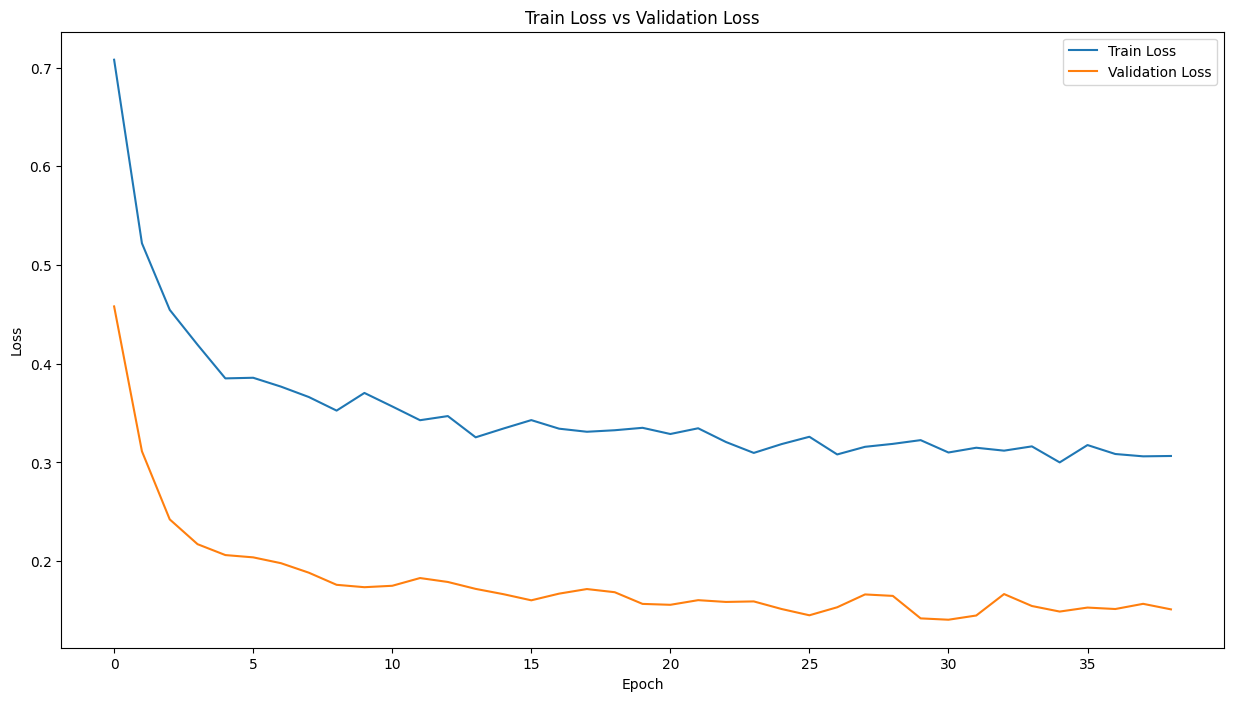

In [55]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

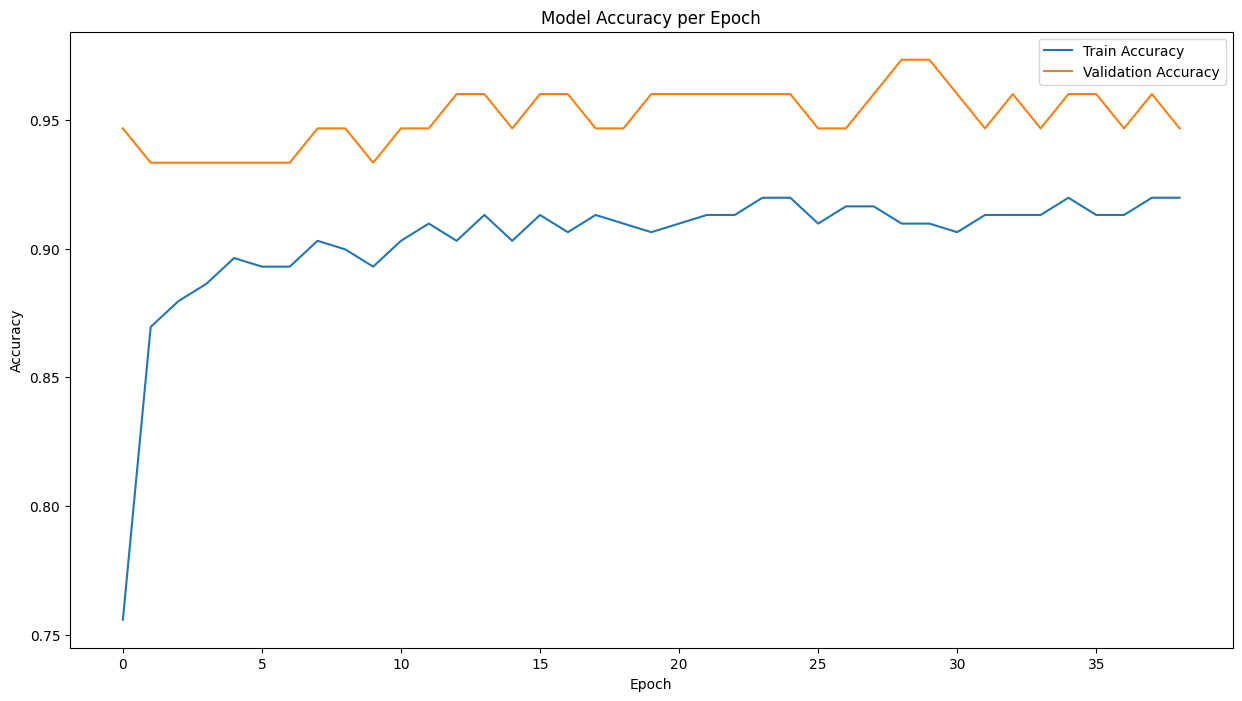

In [54]:
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model Testing with Test data

In [57]:
y_pred_probs = model.predict(X_test_final)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_final, axis=1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Confusion Matrix:
[[13  0  2]
 [ 0 44  0]
 [ 1  0 15]]

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.93      0.87      0.90        15
        None       1.00      1.00      1.00        44
 Sleep Apnea       0.88      0.94      0.91        16

    accuracy                           0.96        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.96      0.96      0.96        75



***Notes***: Our model performs great with None sleep disorder, which took the majority of the data.